<a href="https://colab.research.google.com/github/me-smishra27/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/HEALTH INSURANCE CROSS SELL PREDICTION /TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
dataset = pd.read_csv(filepath)

In [ ]:
dataset.set_index('id', inplace= True)

In [ ]:
dataset['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
dataset['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [ ]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
dataset.shape

(381109, 11)

In [ ]:
dataset['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

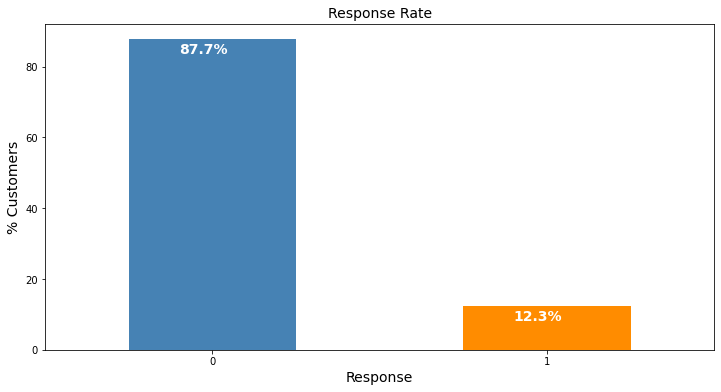

In [ ]:
colors = ['steelblue','darkorange']
response_per = (dataset['Response'].value_counts()*100.0 /len(dataset)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (12,6))

response_per.set_ylabel('% Customers',size = 14)
response_per.set_xlabel('Response',size = 14)
response_per.set_title('Response Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in response_per.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in response_per.patches:
# get_width pulls left or right; get_y pushes up or down
    response_per.text(i.get_x()+.15, i.get_height()-4.0, \
                str(round((i.get_height()/total), 1))+'%',
                fontsize=12,
                color='white',
              weight = 'bold',
              size = 14)


In [ ]:
dataset.drop_duplicates(inplace = True)

In [ ]:
dataset.shape

(380840, 11)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380840 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                380840 non-null  object 
 1   Age                   380840 non-null  int64  
 2   Driving_License       380840 non-null  int64  
 3   Region_Code           380840 non-null  float64
 4   Previously_Insured    380840 non-null  int64  
 5   Vehicle_Age           380840 non-null  object 
 6   Vehicle_Damage        380840 non-null  object 
 7   Annual_Premium        380840 non-null  float64
 8   Policy_Sales_Channel  380840 non-null  float64
 9   Vintage               380840 non-null  int64  
 10  Response              380840 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In [ ]:
dataset.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
num_var = dataset.select_dtypes(include = 'number')
cat_var = dataset.select_dtypes(include = 'object')

In [ ]:
num_var.head(3)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1
2,76,1,3.0,0,33536.0,26.0,183,0
3,47,1,28.0,0,38294.0,26.0,27,1


In [ ]:
cat_var.head(2)

,Gender,Vehicle_Age,Vehicle_Damage
id,,,
1,Male,> 2 Years,Yes
2,Male,1-2 Year,No


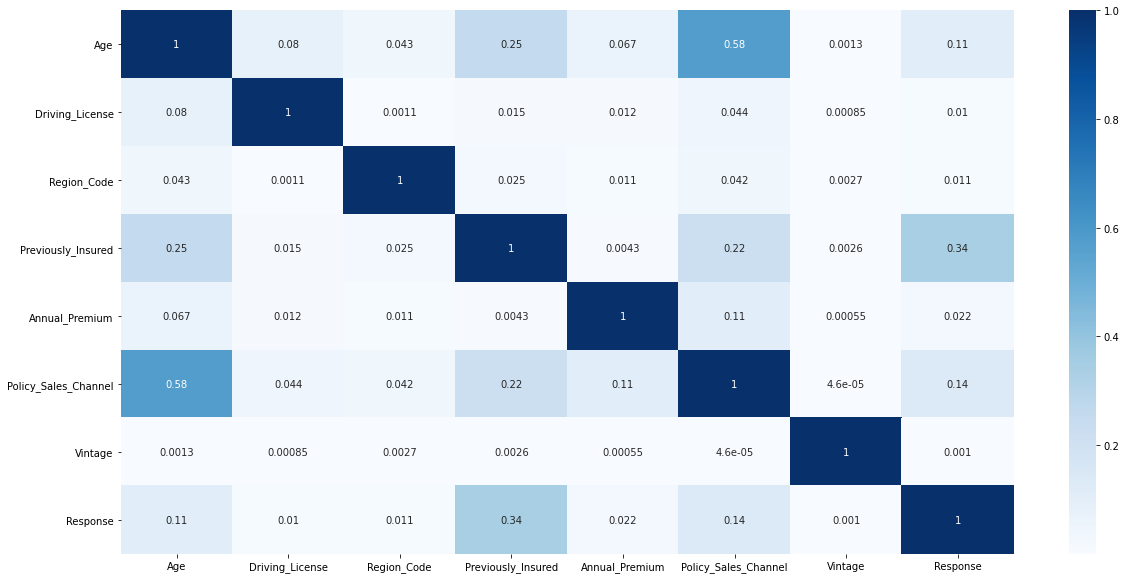

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(num_var.corr().abs(), cmap = 'Blues', annot=True)

In [ ]:
dataset['Gender'].replace('Male', 1, inplace = True)
dataset['Gender'].replace('Female', 0, inplace = True)

In [ ]:
dataset.Vehicle_Damage.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset['Vehicle_Damage'].replace('Yes', 1, inplace = True)
dataset['Vehicle_Damage'].replace('No', 0, inplace = True)

In [ ]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [ ]:
X['Vehicle_Age_>2yrs'] = np.where(X['Vehicle_Age']== '> 2 Years', 1, 0)
X['Vehicle_Age_1-2yrs'] = np.where(X['Vehicle_Age']== '1-2 Year', 1, 0)
X['Vehicle_Age_<1yr'] = np.where(X['Vehicle_Age']=='< 1 Year', 1, 0)

In [ ]:
X.drop(['Vehicle_Age'], axis = 1, inplace = True)

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_>2yrs,Vehicle_Age_1-2yrs,Vehicle_Age_<1yr
id,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1


In [ ]:
Y.head()

id
1    1
2    0
3    1
4    0
5    0
Name: Response, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


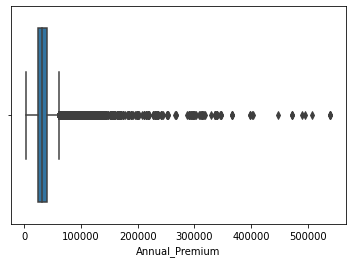

In [ ]:
sns.boxplot(X['Annual_Premium'])

In [ ]:
def remove_outlier_annual_prem(df):
    IQR = df['Annual_Premium'].quantile(0.75) - df['Annual_Premium'].quantile(0.25)
    
    lower_range = df['Annual_Premium'].quantile(0.25) - (1.5 * IQR)
    upper_range = df['Annual_Premium'].quantile(0.75) + (1.5 * IQR)
    
    df.loc[df['Annual_Premium'] <= lower_range, 'Annual_Premium'] = lower_range
    df.loc[df['Annual_Premium'] >= upper_range, 'Annual_Premium'] = upper_range

In [ ]:
remove_outlier_annual_prem(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


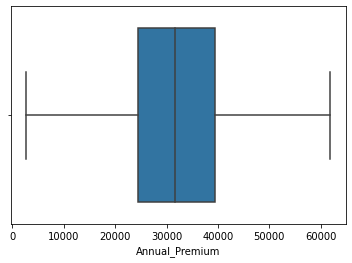

In [ ]:
sns.boxplot(X['Annual_Premium'])

In [ ]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_>2yrs', 'Vehicle_Age_1-2yrs', 'Vehicle_Age_<1yr'],
      dtype='object')

In [ ]:
X['Driving_License'].value_counts()

1    380028
0       812
Name: Driving_License, dtype: int64

In [ ]:
X['Vehicle_Age_>2yrs'].value_counts()

0    364838
1     16002
Name: Vehicle_Age_>2yrs, dtype: int64

In [ ]:
X.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_>2yrs,Vehicle_Age_1-2yrs,Vehicle_Age_<1yr
id,,,,,,,,,,,,
1,1,44,1,28.0,0,1,40454.0,26.0,217,1,0,0
2,1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0
3,1,47,1,28.0,0,1,38294.0,26.0,27,1,0,0
4,1,21,1,11.0,1,0,28619.0,152.0,203,0,0,1
5,0,29,1,41.0,1,0,27496.0,152.0,39,0,0,1


In [ ]:
# working_dir_path = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/ML_CAPSTONE/'

In [ ]:
# X.to_csv(working_dir_path+'cleaned_data.csv', index = False)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(266588, 12)
(114252, 12)


In [ ]:
X.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_>2yrs', 'Vehicle_Age_1-2yrs', 'Vehicle_Age_<1yr'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.92156894,  0.91335408,  0.04526081, ...,  4.77252812,
        -1.05422362, -0.87132974],
       [-1.08510601,  1.62267989,  0.04526081, ..., -0.20953255,
         0.94856536, -0.87132974],
       [-1.08510601,  0.26851244,  0.04526081, ..., -0.20953255,
         0.94856536, -0.87132974],
       ...,
       [-1.08510601,  0.20402828,  0.04526081, ..., -0.20953255,
         0.94856536, -0.87132974],
       [ 0.92156894, -0.50529753,  0.04526081, ..., -0.20953255,
        -1.05422362,  1.14767115],
       [-1.08510601,  0.13954411,  0.04526081, ..., -0.20953255,
         0.94856536, -0.87132974]])

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[ 4.50674123e-02, -3.87803746e-01,  5.84891100e-02,
        -9.73275716e-03, -1.96891879e+00,  1.02109180e+00,
         4.30935409e-02, -1.33388680e-01, -1.63962919e-03,
         1.41075118e-01,  2.56208582e-01, -3.15453786e-01]])

In [ ]:
clf.intercept_

array([-4.11026335])

In [ ]:
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
test_preds

array([[9.99218796e-01, 7.81203825e-04],
       [9.99595954e-01, 4.04045980e-04],
       [8.46448428e-01, 1.53551572e-01],
       ...,
       [9.99082846e-01, 9.17153896e-04],
       [7.77748429e-01, 2.22251571e-01],
       [6.51734730e-01, 3.48265270e-01]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.0007812 , 0.00040405, 0.15355157, ..., 0.00091715, 0.22225157,
       0.34826527])

In [ ]:
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_class_preds 

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8770012153585308
The accuracy on test data is  0.878339110037461


[[233798      3]
 [ 32787      0]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not-Interested')]

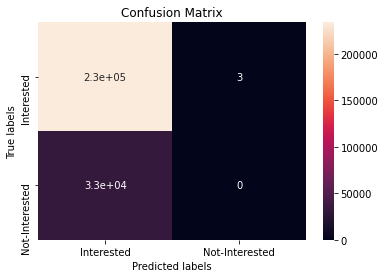

In [ ]:
labels = ['Interested', 'Not-Interested']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[100352      2]
 [ 13898      0]]


[Text(0, 0.5, 'Interested'), Text(0, 1.5, 'Not-Interested')]

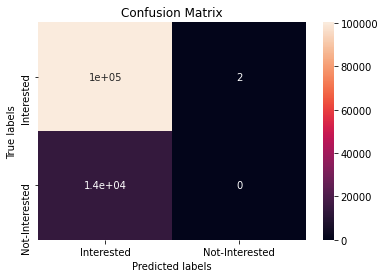

In [ ]:
labels = ['Interested', 'Not-Interested']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.877, test=0.877), total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] ............. , accuracy=(train=0.877, test=0.877), total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ............. , accuracy=(train=0.877, test=0.877), total=   1.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.3s remaining:    0.0s


[CV] ............. , accuracy=(train=0.877, test=0.877), total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.5s remaining:    0.0s


[CV] ............. , accuracy=(train=0.877, test=0.877), total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [ ]:
scores['train_accuracy']

array([0.87700098, 0.87701505, 0.87700567, 0.87699687, 0.87699218])

In [ ]:
scores['test_accuracy']

array([0.87702089, 0.87696463, 0.87700214, 0.87701859, 0.87701859])

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[ 0.04667836 -0.38279335  0.05682487 -0.00974069 -1.98857854  1.01393879
   0.04259882 -0.13738807 -0.00205882  0.13953621  0.25121275 -0.30979387]]
[[ 4.37984194e-02 -3.84642591e-01  5.53615120e-02 -1.25075617e-02
  -1.97637304e+00  1.03205528e+00  4.54900481e-02 -1.27642891e-01
  -9.93606492e-05  1.39716233e-01  2.55077088e-01 -3.13762439e-01]]
[[ 4.32676297e-02 -3.86264703e-01  6.08100912e-02 -7.89069554e-04
  -1.93450637e+00  1.02209208e+00  4.05632755e-02 -1.35287666e-01
  -2.55824328e-03  1.43213378e-01  2.53144175e-01 -3.13231112e-01]]
[[ 0.0475285  -0.38924667  0.06539145 -0.01050588 -1.99676755  1.01798212
   0.04698312 -0.13435282 -0.00490774  0.13941285  0.25808796 -0.31667474]]
[[ 4.40540764e-02 -3.96088250e-01  5.47090912e-02 -1.50307188e-02
  -1.94539991e+00  1.01966070e+00  3.98493721e-02 -1.32284471e-01
   1.33509998e-03  1.43480731e-01  2.63559150e-01 -3.23838739e-01]]


In [ ]:
from sklearn.metrics import accuracy_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
dat_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dat_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_predicted = dat_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test[:10]

id
242793    0
41417     0
297286    0
282175    0
165066    0
342708    0
307686    1
198315    0
72179     0
144871    0
Name: Response, dtype: int64

In [ ]:
accuracy_score(y_test, y_predicted) * 100

87.83566152014845

In [ ]:
text_representation = tree.export_text(dat_classifier)
print(text_representation)

|--- feature_4 <= 0.08
|   |--- feature_5 <= -0.01
|   |   |--- class: 0
|   |--- feature_5 >  -0.01
|   |   |--- feature_1 <= -0.80
|   |   |   |--- feature_7 <= 0.86
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  0.86
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.80
|   |   |   |--- feature_1 <= 1.27
|   |   |   |   |--- feature_1 <= 0.62
|   |   |   |   |   |--- feature_7 <= 0.23
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_7 >  0.23
|   |   |   |   |   |   |--- feature_7 <= 0.77
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.77
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  0.62
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.27
|   |   |   |   |--- class: 0
|--- feature_4 >  0.08
|   |--- feature_5 <= -0.01
|   |   |--- class: 0
|   |--- feature_5 >  -0.01
|   |   |--- class: 0



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

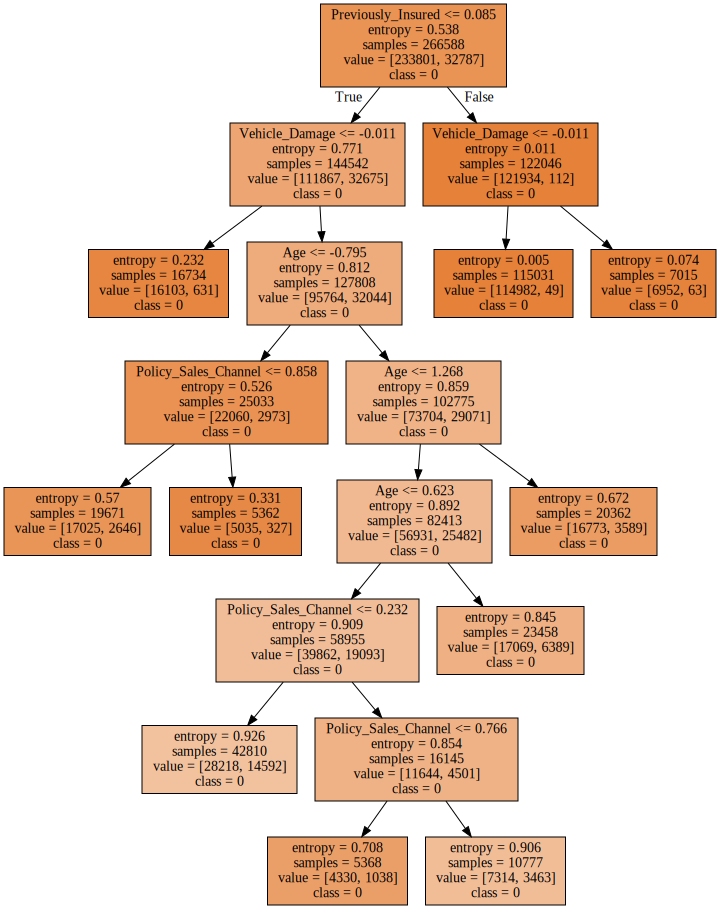

In [ ]:
graph = Source(tree.export_graphviz(dat_classifier, out_file=None
   , feature_names=X.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))